In [1]:
import wandb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
run = wandb.init(project="tracking_demo")

wandb: Currently logged in as: swal706 (swal706-western-governors-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [3]:
# Storing hyper parameters
run.config.update({
    "batch_size": 128,
    "weight_decay": 0.01,
    "augmentations": {
        "rot_angle": 45,
        "crop_size": 224
    }
})

# NOTE: if we have arguments to argparse, we can do:
# parser = argparse.ArgumentParser(description="Train a Random Forest")
# parser.add_argument("--batch_size", type=int, ...)
# parser.add_argument("--weight_decay", type=float, ...)
# args = parser.parse_arguments()
# run.config.update(args)

In [4]:
# Log a final score
run.summary['accuracy'] = 0.9

In [5]:
# Log a time-varying metric
# The last value will also be reported in the table, unless
# we override it with run.summary['loss']
for i in range(10):
    run.log(
        {
            "loss": 1.2 - i * 0.1
        }
    )

In [6]:
# Log multiple time-varying metrics
for i in range(10):
    run.log(
        {
            "recall": 0.8 + i * 0.01,
            "ROC": 0.1 + i**2 * 0.01
        }
    )

In [7]:
# Explicit x-axis
for i in range(10):
    run.log(
        {
            "precision": 0.8 + i * 0.01,
            "epoch": i
        }
    )

/tmp/ipykernel_240990/3196780892.py:8: RuntimeWarning: invalid value encountered in sqrt
  eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
/tmp/ipykernel_240990/3196780892.py:9: RuntimeWarning: invalid value encountered in sqrt
  eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
/tmp/ipykernel_240990/3196780892.py:10: RuntimeWarning: invalid value encountered in sqrt
  eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
/tmp/ipykernel_240990/3196780892.py:11: RuntimeWarning: invalid value encountered in sqrt
  eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
/tmp/ipykernel_240990/3196780892.py:12: RuntimeWarning: invalid value encountered in sqrt
  eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
/tmp/ipykernel_240990/3196780892.py:13: RuntimeWarning: invalid value encountered in sqrt
  eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs

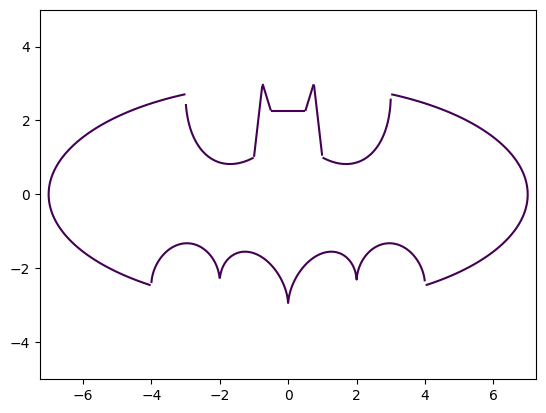

In [8]:
from numpy import sqrt 

# Credits: Trae Blain (https://gist.github.com/traeblain/1487795)
x1 = np.arange(-7.25, 7.25, 0.012)
y1 = np.arange(-5, 5, 0.012)
x, y = np.meshgrid(x1, y1)

eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs(x)-1)/(abs(x)-1))-(6*sqrt(10)/14)*sqrt(4-(abs(x)-1)**2)-y)
equation=[eq1,eq2,eq3,eq4,eq5,eq6]

fig, sub = plt.subplots()
for f in equation:
    sub.contour(x, y, f, [0])

In [9]:
run.log({
    "batman": wandb.Image(fig)
})

In [10]:
run.finish()

ROC,▁▁▁▂▂▃▄▅▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▆▅▄▃▃▂▁
precision,▁▂▃▃▄▅▆▆▇█
recall,▁▂▃▃▄▅▆▆▇█
ROC,0.91
accuracy,0.9
epoch,9
loss,0.3
precision,0.89
recall,0.89
